# Sobel Edge Detection

## Task
Edge detection is a technique of image processing used to identify points in a digital image with discontinuities, simply to say, sharp changes in the image brightness. These points where the image brightness varies sharply are called the edges (or boundaries) of the image. Design and implement a program that will organize and save an edge detection image using the “Sobel edge detection” method.
I should mention that when implementing the program, the corresponding functions should not be called, but implemented.

# Importing libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading image

In [2]:
img = cv2.imread('src/img/image.jpg')
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 1, 1],
        [0, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 1, 1],
        [0, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 1, 1],
        [0, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Text(0.5, 1.0, 'Original Image')

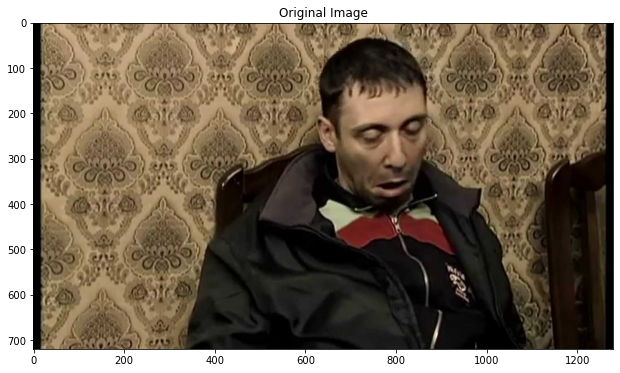

In [3]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.set_title('Original Image')

# Preparing the image
## Getting the grayscale

Text(0.5, 1.0, 'Grayscaled Image')

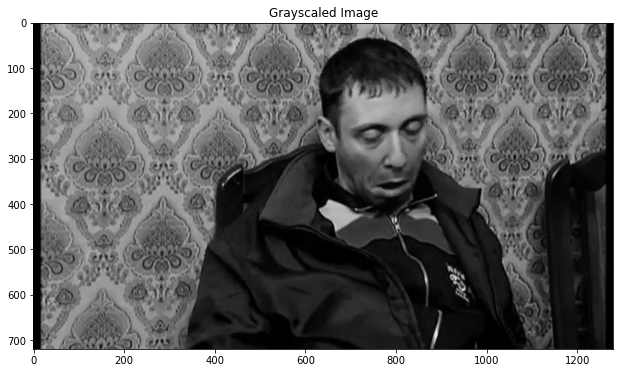

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(gray, cmap="gray")
ax.set_title('Grayscaled Image')

## Sobel Operators
Sobel Operators are two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – for horizontal and vertical changes:

$$
G_x=
\begin{bmatrix}
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1\\
\end{bmatrix};
G_y=
\begin{bmatrix}
1 & 2 & -1\\
0 & 0 & 0\\
-1 & -2 & -1\\
\end{bmatrix}
$$

In [5]:
kernel_x = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

kernel_y = np.array(
[
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

kernel_x, kernel_y

(array([[ 1,  0, -1],
        [ 2,  0, -2],
        [ 1,  0, -1]]),
 array([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]]))

Then two functions are used:
* for padding the original image for calculating the egdes of the image
* for convolution to find the sobel edges

*Note: Padding just adds a couple of zero values at the beginning and end of the matrix (for both rows and coloumns).*

In [6]:
def padding(image, pad=2):
    new_shape = tuple(map(lambda i, j: i + j, image.shape, (pad, pad)))
    padded_image = np.zeros(new_shape, dtype=int)
    lower = int(pad/2)
    padded_image[lower:new_shape[0] - lower, lower:new_shape[1] - lower] = image
    return padded_image, (pad, pad)

def convolution(image, kernel, padding_size):
    convolved_image = np.zeros(tuple(map(lambda i, j: i - j, image.shape, (2, 2))))
    for i in range(image.shape[0] - padding_size[0]):
            for j in range(image.shape[1] - padding_size[1]):
                convolved_image[i][j] = np.sum(image[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel)
    return convolved_image

Padded matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Text(0.5, 1.0, 'Gradient Approximations (x)')

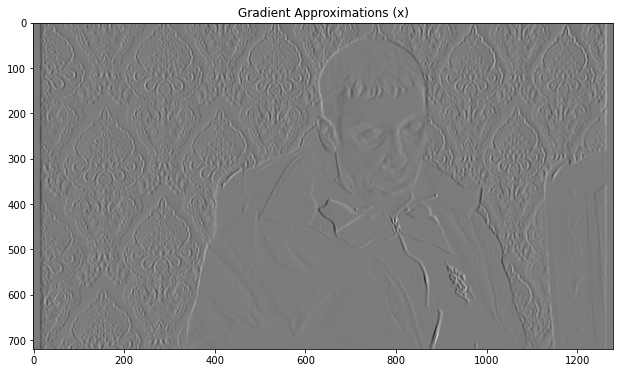

In [7]:
padded_matrix, padding_size = padding(gray)
print('Padded matrix:\n', padded_matrix)
G_x = convolution(padded_matrix, kernel_x, padding_size)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(G_x, cmap="gray")
ax.set_title('Gradient Approximations (x)')

Now calculating the same for *y* direction:

Text(0.5, 1.0, 'Gradient Approximations (y)')

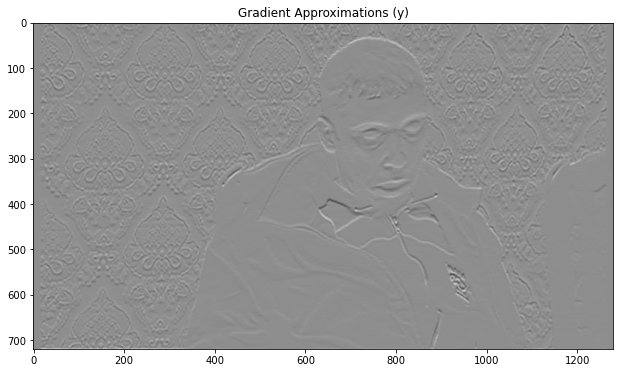

In [8]:
G_y = convolution(padded_matrix, kernel_y, padding_size)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(G_y, cmap="gray")
ax.set_title('Gradient Approximations (y)')

To get the **Gradient Magnitude**:
$$G=\sqrt{G_x^2 + G_y^2}$$

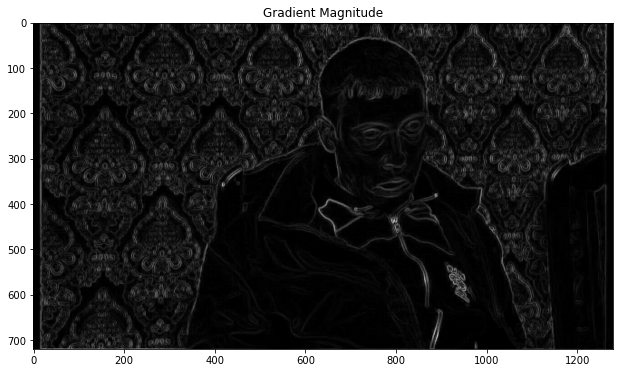

In [9]:
edges = np.sqrt(G_x**2 + G_y**2)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(edges, cmap="gray")
ax.set_title('Gradient Magnitude')
plt.imsave('src/img/image_gradient_mag.jpg', edges, cmap="gray")

To get the **Gradient Directions**:
$$\theta=atan^{-1}{\frac{G_y}{G_x}}$$

Text(0.5, 1.0, 'Gradient Directions')

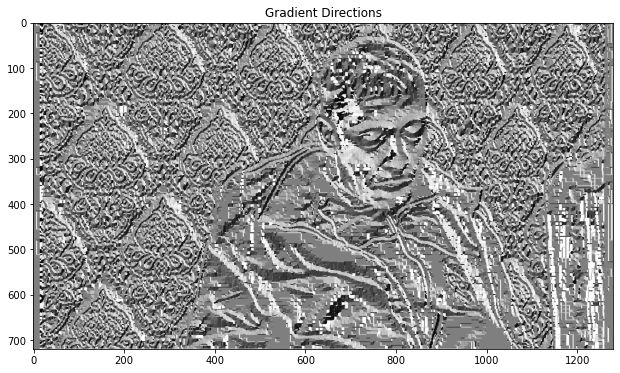

In [10]:
gradients = np.arctan2(G_y, G_x)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(gradients, cmap="gray")
ax.set_title('Gradient Directions')